In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import backend as K
import gc

### loading the dataset as a tf.data.dataset object

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory=r'C:\Users\VICTUS\Desktop\pattern project\RealWaste',
    batch_size=8,
    image_size=(524,524),     #resizing
    shuffle=True,
    seed=123
)

Found 4752 files belonging to 9 classes.


In [4]:
dataset.class_names

['Cardboard',
 'Food Organics',
 'Glass',
 'Metal',
 'Miscellaneous Trash',
 'Paper',
 'Plastic',
 'Textile Trash',
 'Vegetation']

(8, 524, 524, 3)
(8,)


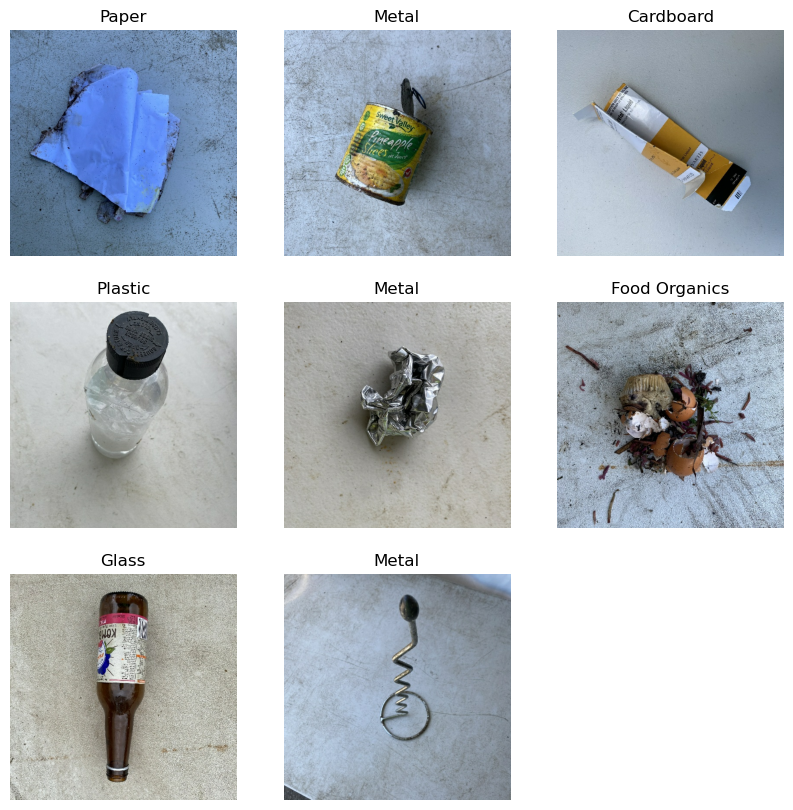

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):

  print(images.shape)
  print(labels.shape)

  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(dataset.class_names[labels[i]])
    plt.axis("off")

In [7]:
len(dataset)

594

In [8]:
train_dataset=dataset.take(416)
remaining=dataset.skip(416)

print(f"Percentage of traning set {round(((len(train_dataset)/len(dataset))*100))} %")
print(f"Percentage of test set {round(((len(remaining)/len(dataset))*100))} %")


Percentage of traning set 70 %
Percentage of test set 30 %


In [9]:
test_dataset=remaining.take(89)
cv_dataset=remaining.skip(89)
print(f"Percentage of traning set {round(((len(test_dataset)/len(dataset))*100))} %")
print(f"Percentage of test set {round(((len(cv_dataset)/len(dataset))*100))} %")

Percentage of traning set 15 %
Percentage of test set 15 %


In [10]:
def class_counts(dataset, num_classes):
    counts = np.zeros(num_classes, dtype=int)
    for _, labels in dataset.unbatch():      # unbatch = go sample-by-sample
        if len(labels.shape) == 0:           
            counts[labels.numpy()] += 1
        else:                                # one-hot labels
            counts[np.argmax(labels.numpy())] += 1
    return counts

In [11]:
#dataset_counts = class_counts(dataset, 9)
#dataset_counts

In [12]:
#train_counts = class_counts(train_dataset, 9)
#train_counts

In [13]:
#test_counts = class_counts(test_dataset, 9)
#test_counts

In [14]:
#cv_counts = class_counts(cv_dataset, 9)
#cv_counts

In [15]:
from keras import Sequential
from keras.layers import Resizing, Rescaling, RandomRotation, RandomFlip , Dropout

#preprocessing Pipeline
#normalizing the dataset

rescale_resize=Sequential([
    Rescaling(1.0/255),
    Resizing(524,524)
])

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [16]:
from keras import layers
model = Sequential([
    rescale_resize,
    #data_augmentation,
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu',padding='same', input_shape=(524,524,3)),
    layers.MaxPooling2D((2, 2)),
    #Dropout(0.2),

    layers.Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    #Dropout(0.2),

    #layers.Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D((2, 2)),
    #Dropout(0.2),

    #layers.Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D((2, 2)),
    #Dropout(0.2),

    #layers.Conv2D(128,kernel_size = (3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D((2, 2)),
    #Dropout(0.2),

    #layers.Conv2D(128,kernel_size = (3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D((2, 2)),
    #Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #Dropout(0.2),
   
    layers.Dense(9, activation='softmax'),
])

In [17]:
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.fit(train_dataset,epochs=20,validation_data=cv_dataset)

Epoch 1/20


416/416 [==============================] - 52s 112ms/step - loss: 5.6548 - accuracy: 0.2242 - val_loss: 2.1203 - val_accuracy: 0.2360
Epoch 2/20
416/416 [==============================] - 47s 113ms/step - loss: 1.9227 - accuracy: 0.3080 - val_loss: 1.9827 - val_accuracy: 0.3132
Epoch 3/20
416/416 [==============================] - 47s 114ms/step - loss: 1.1440 - accuracy: 0.6193 - val_loss: 2.5667 - val_accuracy: 0.2654
Epoch 4/20
416/416 [==============================] - 47s 113ms/step - loss: 0.5421 - accuracy: 0.8395 - val_loss: 3.9015 - val_accuracy: 0.2921
Epoch 5/20
416/416 [==============================] - 47s 114ms/step - loss: 0.2491 - accuracy: 0.9342 - val_loss: 4.6375 - val_accuracy: 0.2584
Epoch 6/20
416/416 [==============================] - 47s 113ms/step - loss: 0.1602 - accuracy: 0.9609 - val_loss: 4.2912 - val_accuracy: 0.2374
Epoch 7/20
416/416 [==============================] - 47s 113ms/step - loss: 0.1268 - accuracy: 0.9672 - val_loss: 5.0788 - val_accuracy: 0.2